## Add random noise

In [161]:
# Import libraries

import warnings
warnings.filterwarnings('ignore')

from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [162]:
# load MNIST dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [177]:
train_images.shape

(60000, 28, 28)

In [164]:
# reshape for tenserflow backend
reshaped_train_images = train_images.reshape((60000, 28, 28, 1))
reshaped_test_images = test_images.reshape((10000, 28, 28, 1))

# rescale pixel values from range [0, 255] to [0, 1]
rescaled_train_images= reshaped_train_images.astype('float32') / 255 
rescaled_test_images= reshaped_test_images.astype('float32') / 255

# converts a class vector (integers) to binary class matrix
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


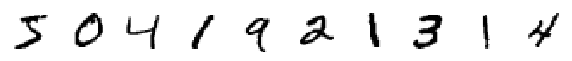

In [176]:
# show sample train images without noise
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(rescaled_train_images[i].reshape(28,28), cmap=plt.cm.binary)

In [165]:
noise_factor = 0.1

train_images_noisy = rescaled_train_images + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=rescaled_train_images.shape)
test_images_noisy = rescaled_test_images + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=rescaled_test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

In [166]:
# get test set
final_test_labels = test_labels
final_test_images = test_images_noisy

# get validation set
validation_images = train_images_noisy[50000:]
validation_labels = train_labels[50000:]

# get train set
final_train_images = train_images_noisy[:50000]
final_train_labels = train_labels[:50000]

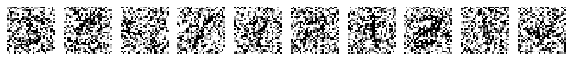

In [173]:
# show sample train images with noise
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(final_train_images[i].reshape(28,28), cmap=plt.cm.binary)

In [167]:
# function to build a CNN model

def create_model():
    # Convolutional model
    model = models.Sequential()

    # Conv Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    
    # Pool Layer 1
    model.add(layers.MaxPooling2D((2, 2)))

    # Conv Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    # Pool Layer 2
    model.add(layers.MaxPooling2D((2, 2)))

    # Conv Layer 3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    # Flatten layer
    model.add(layers.Flatten())

    # Fully-connected layer 1
    model.add(layers.Dense(64, activation='relu'))
    
    # Fully-connected layer 2
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [168]:
# build a model
model = create_model()

In [169]:
# Train the model
model.fit(final_train_images, final_train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 13s 261us/step - loss: 1.0046 - accuracy: 0.6558 - val_loss: 0.7258 - val_accuracy: 0.7537
Epoch 2/5
50000/50000 [==============================] - 15s 304us/step - loss: 0.6525 - accuracy: 0.7769 - val_loss: 0.6434 - val_accuracy: 0.7791
Epoch 3/5
50000/50000 [==============================] - 15s 305us/step - loss: 0.5765 - accuracy: 0.8043 - val_loss: 0.5926 - val_accuracy: 0.7968
Epoch 4/5
50000/50000 [==============================] - 15s 302us/step - loss: 0.5275 - accuracy: 0.8214 - val_loss: 0.5935 - val_accuracy: 0.7998
Epoch 5/5
50000/50000 [==============================] - 15s 307us/step - loss: 0.4878 - accuracy: 0.8332 - val_loss: 0.5568 - val_accuracy: 0.8097


In [178]:
# Accuracy against test set

test_loss, test_acc = model.evaluate(final_test_images, final_test_labels, verbose=1)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 2s 178us/step
Accuracy: 0.8137000203132629
Loss:  0.5425599935054779
